In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/car_data.csv')

In [4]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [5]:
df['transmission'].value_counts()

,count
transmission,
a,467
m,83


In [6]:
df['fuel_type'].value_counts()

,count
fuel_type,
gas,546
diesel,2
electricity,2


In [7]:
df['class'].value_counts()

,count
class,
small sport utility vehicle,157
subcompact car,85
compact car,83
two seater,69
midsize car,53
standard sport utility vehicle,34
minicompact car,21
large car,13
small station wagon,11


In [8]:
df['drive'].value_counts()

,count
drive,
awd,215
fwd,178
rwd,115
4wd,42


In [9]:
df['make'].value_counts().T

,count
make,
bmw,72
jaguar,71
kia,69
mini,51
hyundai,38
audi,31
genesis,26
chevrolet,23
jeep,22


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [11]:
df.isna().sum()

,0
city_mpg,0
class,0
combination_mpg,0
cylinders,2
displacement,2
drive,0
fuel_type,0
highway_mpg,0
make,0
model,0


In [12]:
for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-12-089c2449831a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        550 non-null    float64
 4   displacement     550 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [14]:
### backup
df_copy = df.copy()

In [15]:
df['year'] = 2024 - df['year']

In [16]:
df.head(5)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,10
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,10
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,10
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,10
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,10


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['class', 'drive', 'fuel_type', 'make', 'model', 'transmission'], dtype='object')

In [19]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [20]:
df.head(5)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,2,36,19,15,1,10
1,26,2,30,4.0,2.5,2,2,37,19,15,0,10
2,25,7,27,4.0,2.5,2,2,31,19,74,0,10
3,26,7,29,4.0,2.0,2,2,34,19,74,1,10
4,26,7,28,4.0,2.0,2,2,32,19,74,0,10


In [21]:
X = df.drop(['combination_mpg','city_mpg','highway_mpg'], axis=1)
y = df['combination_mpg']

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

In [25]:
model.fit(X_train, y_train,)

RandomForestRegressor(oob_score=True, random_state=0)

In [26]:
model.score(X_test, y_test)

0.8679810971339622

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.4407399282828277
R-squared: 0.8679810971339622


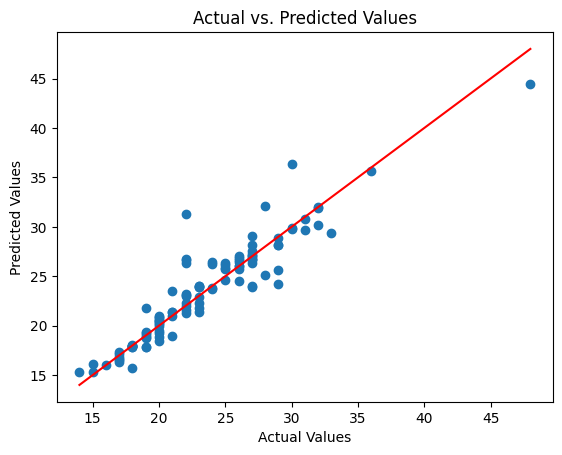

In [31]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [32]:
importances = model.feature_importances_

class: 0.0223
cylinders: 0.2530
displacement: 0.1984
drive: 0.0350
fuel_type: 0.3322
make: 0.0654
model: 0.0643
transmission: 0.0047
year: 0.0247


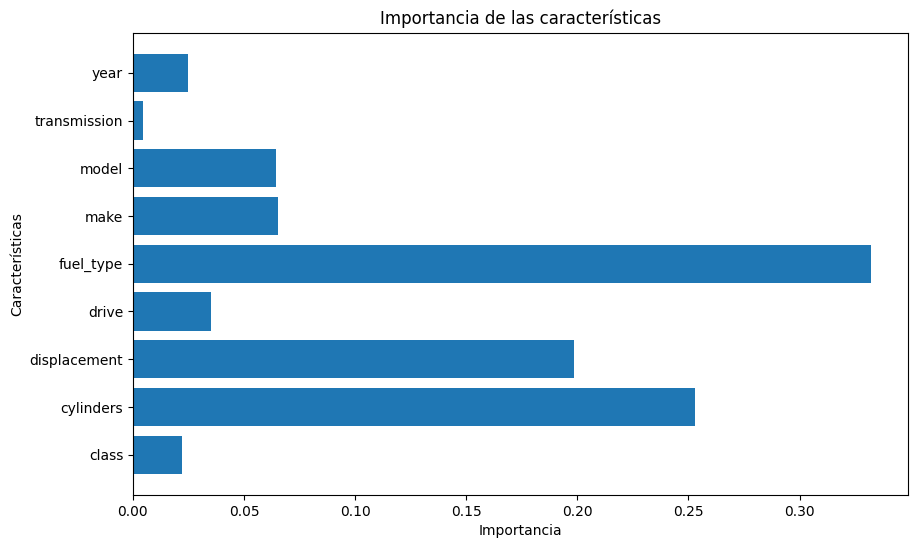

In [33]:
for feature_name, importance in zip(X.columns, importances):
     print(f"{feature_name}: {importance:.4f}")
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características')
plt.show()

In [34]:
corr = df.corr()

<Axes: >

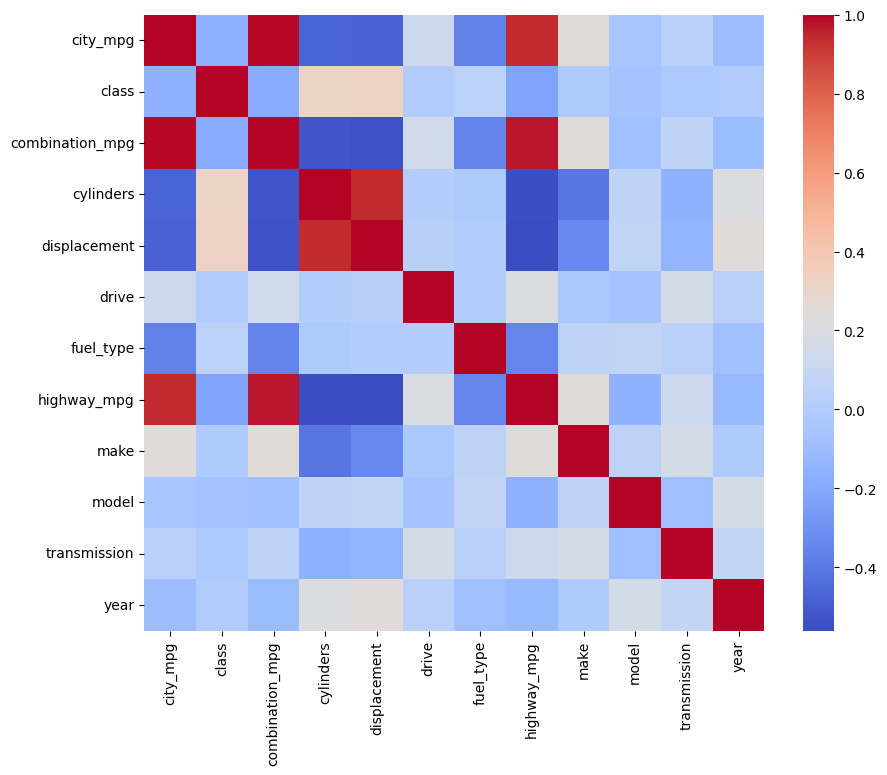

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')

In [36]:
import pickle